In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
ruta_archivo1 = "Datasets/ElectricCarData_Norm.csv"
df = pd.read_csv(ruta_archivo1)

print(df.head())

         Brand                          Model     Accel  TopSpeed   Range  \
0       Tesla   Model 3 Long Range Dual Motor   4.6 sec  233 km/h  450 km   
1  Volkswagen                       ID.3 Pure  10.0 sec  160 km/h  270 km   
2    Polestar                               2   4.7 sec  210 km/h  400 km   
3         BMW                            iX3    6.8 sec  180 km/h  360 km   
4       Honda                              e    9.5 sec  145 km/h  170 km   

  Efficiency FastCharge              RapidCharge        PowerTrain  \
0  161 Wh/km   940 km/h  Rapid charging possible   All Wheel Drive   
1  167 Wh/km   250 km/h  Rapid charging possible  Rear Wheel Drive   
2  181 Wh/km   620 km/h  Rapid charging possible   All Wheel Drive   
3  206 Wh/km   560 km/h  Rapid charging possible  Rear Wheel Drive   
4  168 Wh/km   190 km/h  Rapid charging possible  Rear Wheel Drive   

     PlugType  BodyStyle Segment  Seats  PriceEuro  
0  Type 2 CCS      Sedan       D      5      55480  
1  Type 2 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        103 non-null    object
 1   Model        103 non-null    object
 2   Accel        103 non-null    object
 3   TopSpeed     103 non-null    object
 4   Range        103 non-null    object
 5   Efficiency   103 non-null    object
 6   FastCharge   103 non-null    object
 7   RapidCharge  103 non-null    object
 8   PowerTrain   103 non-null    object
 9   PlugType     103 non-null    object
 10  BodyStyle    103 non-null    object
 11  Segment      103 non-null    object
 12  Seats        103 non-null    int64 
 13  PriceEuro    103 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 11.4+ KB


# ETL

In [4]:
df.rename(columns={
    'Brand': 'Marca',
    'Model': 'Modelo',
    'Accel': 'Aceleracion(segundos)',
    'TopSpeed': 'VelocidadMax(km/h)',
    'Range': 'Autonomia(km)', # Autonomía del vehículo con una sola carga, expresada en km
    'Efficiency': 'Eficiencia(Wh/km)', # vatios-hora por kilómetro
    'FastCharge': 'CargaRapida(km/h)',# cuántos km de autonomía se pueden cargar en una hora, expresada en km/h.
    'RapidCharge': 'CargaRapidaPosible',
    'PowerTrain': 'TipoTraccion',
    'PlugType': 'TipoEnchufe',
    'BodyStyle': 'EstiloCarroceria',
    'Segment': 'Segmento',
    'Seats': 'Asientos',
    'PriceEuro': 'PrecioEuro'
}, inplace=True)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Marca                  103 non-null    object
 1   Modelo                 103 non-null    object
 2   Aceleracion(segundos)  103 non-null    object
 3   VelocidadMax(km/h)     103 non-null    object
 4   Autonomia(km)          103 non-null    object
 5   Eficiencia(Wh/km)      103 non-null    object
 6   CargaRapida(km/h)      103 non-null    object
 7   CargaRapidaPosible     103 non-null    object
 8   TipoTraccion           103 non-null    object
 9   TipoEnchufe            103 non-null    object
 10  EstiloCarroceria       103 non-null    object
 11  Segmento               103 non-null    object
 12  Asientos               103 non-null    int64 
 13  PrecioEuro             103 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 11.4+ KB


In [6]:
df

,Marca,Modelo,Aceleracion(segundos),VelocidadMax(km/h),Autonomia(km),Eficiencia(Wh/km),CargaRapida(km/h),CargaRapidaPosible,TipoTraccion,TipoEnchufe,EstiloCarroceria,Segmento,Asientos,PrecioEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5 sec,160 km/h,330 km,191 Wh/km,440 km/h,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5 sec,210 km/h,335 km,258 Wh/km,540 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9 sec,200 km/h,325 km,194 Wh/km,440 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1 sec,200 km/h,375 km,232 Wh/km,450 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,65000


Transformamos los datos para que sea màs fàcil su posterior manipulaciòn. Eliminamos expresiones string para que las columnas queden como numèricas

In [7]:

# Eliminar " sec" de todas las filas en la columna 'Aceleracion(segundos)'
df['Aceleracion(segundos)'] = df['Aceleracion(segundos)'].str.replace(' sec', '')

# Convertir la columna 'Aceleracion' a float
df['Aceleracion(segundos)'] = df['Aceleracion(segundos)'].astype(float)



In [8]:
# Eliminar "km/h" de todas las filas en la columna 'VelocidadMax(km/h)'
df['VelocidadMax(km/h)'] = df['VelocidadMax(km/h)'].str.replace(' km/h', '')

# Convertir la columna 'VelocidadMax' a integer
df['VelocidadMax(km/h)'] = df['VelocidadMax(km/h)'].astype(int)

In [9]:
# Eliminar "km" de todas las filas en la columna 'Autonomia(km)'
df['Autonomia(km)'] = df['Autonomia(km)'].str.replace(' km', '')

# Convertir la columna 'Autonomia' a integer
df['Autonomia(km)'] = df['Autonomia(km)'].astype(int)


In [10]:
# Eliminar "Wh/km" de todas las filas en la columna 'Eficiencia(Wh/km)'
df['Eficiencia(Wh/km)'] = df['Eficiencia(Wh/km)'].str.replace(' Wh/km', '')

# Convertir la columna 'Autonomia' a integer
df['Eficiencia(Wh/km)'] = df['Eficiencia(Wh/km)'].astype(int)


In [13]:
# Reemplazar '-' por NaN
df['CargaRapida(km/h)'] = df['CargaRapida(km/h)'].replace('-', np.nan)

# Eiminar fila con NaN
df.dropna(subset=['CargaRapida(km/h)'], inplace=True)

# Eliminar "km/h" de todas las filas en la columna 'CargaRapida(km/h)'
df['CargaRapida(km/h)'] = df['CargaRapida(km/h)'].str.replace(' km/h', '')

# Convertir la columna 'Autonomia' a integer
df['CargaRapida(km/h)'] = df['CargaRapida(km/h)'].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 0 to 102
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Marca                  98 non-null     object 
 1   Modelo                 98 non-null     object 
 2   Aceleracion(segundos)  98 non-null     float64
 3   VelocidadMax(km/h)     98 non-null     int64  
 4   Autonomia(km)          98 non-null     int64  
 5   Eficiencia(Wh/km)      98 non-null     int64  
 6   CargaRapida(km/h)      98 non-null     int64  
 7   CargaRapidaPosible     98 non-null     object 
 8   TipoTraccion           98 non-null     object 
 9   TipoEnchufe            98 non-null     object 
 10  EstiloCarroceria       98 non-null     object 
 11  Segmento               98 non-null     object 
 12  Asientos               98 non-null     int64  
 13  PrecioEuro             98 non-null     int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 11.5+ KB


# EDA

Estadísticas descriptivas:
    
- Aceleración (segundos):El tiempo promedio de aceleración de 0 a 100 km/h es de aproximadamente 7 segundos, lo que indica un rendimiento relativamente rápido en general. La desviación estándar de aproximadamente 2.48 segundos muestra variabilidad en el rendimiento de aceleración entre los vehículos, cuyo rango va desde una aceleración de 2.1 segundos hasta los 14 segundos.

- Velocidad Máxima (km/h): La velocidad máxima promedio es de aproximadamente 182 km/h. La variabilidad en la velocidad máxima se refleja en una desviación estándar de 43.25 km/h, desde 123 km/h hasta 410 km/h.

- Autonomía (km): La autonomía promedio de los vehículos es de 350 km por carga, lo que sugiere que muchos vehículos pueden manejar las necesidades diarias de conducción sin recarga frecuente. La variabilidad en la autonomía (desviación estándar de 118.22 km) va desde 970 km, hasta 170 km.

- Eficiencia (Wh/km): La eficiencia energética promedio es de aproximadamente 190 Wh/km. Valores más bajos indican mayor eficiencia, es decir, menos energía utilizada por kilómetro.
La desviación estándar de 30.06 Wh/km y un rango de 104 a 273 Wh/km.
    
- Carga Rápida (km/h): La velocidad de carga rápida promedio es de 457 km/h, lo que indica que, en promedio, los vehículos pueden recargar una cantidad significativa de autonomía en una hora.
Una amplia gama en la velocidad de carga rápida (desde 170 km/h hasta 940 km/h) sugiere diferencias significativas en la tecnología de carga entre los vehículos.

- Asientos: En promedio, los vehículos tienen casi 5 asientos, con una ligera variabilidad (desviación estándar de 0.69).

- Precio Euro: El precio promedio es de aproximadamente 57,325 euros, con una amplia gama de precios desde 20,129 euros hasta 215,000 euros. La desviación estándar de aproximadamente 34,288 euros refleja esta amplia variabilidad en el precio.

In [17]:
print(df.describe())

       Aceleracion(segundos)  VelocidadMax(km/h)  Autonomia(km)  \
count              98.000000           98.000000      98.000000   
mean                7.046939          181.653061     350.153061   
std                 2.483895           43.248527     118.217984   
min                 2.100000          123.000000     170.000000   
25%                 5.100000          150.000000     258.750000   
50%                 7.300000          167.000000     350.000000   
75%                 8.950000          200.000000     407.500000   
max                14.000000          410.000000     970.000000   

       Eficiencia(Wh/km)  CargaRapida(km/h)   Asientos     PrecioEuro  
count          98.000000          98.000000  98.000000      98.000000  
mean          189.867347         456.734694   4.959184   57324.683673  
std            30.055837         201.262897   0.687418   34288.246370  
min           104.000000         170.000000   4.000000   20129.000000  
25%           168.000000         275

Matriz de correlación de Pearson

- Aceleración y Velocidad Máxima (−0.84): Una fuerte correlación negativa sugiere que los vehículos que aceleran más rápido tienden a tener una mayor velocidad máxima.

- Aceleración y Autonomía (−0.66): Una correlación negativa moderada indica que los vehículos que aceleran más rápido generalmente tienen una mayor autonomía.

- Aceleración y Carga Rápida (−0.77): Una fuerte correlación negativa indica que los vehículos con tiempos de aceleración más rápidos pueden cargar una mayor cantidad de autonomía por hora.

- Velocidad Máxima y Autonomía (0.73): Una correlación positiva fuerte significa que los vehículos con mayores velocidades máximas suelen tener también mayor autonomía.

- Velocidad Máxima y Carga Rápida (0.77): Una fuerte correlación positiva indica que los vehículos con mayores velocidades máximas también pueden cargar más rápidamente.

- Velocidad Máxima y Precio (0.82): Una correlación muy fuerte sugiere que los vehículos con velocidades máximas más altas tienden a ser más caros.

- Autonomía y Carga Rápida (0.70): Una correlación positiva fuerte muestra que los vehículos con mayor autonomía también suelen tener mayores velocidades de carga rápida.

- Autonomía y Precio (0.66): Una correlación positiva fuerte indica que los vehículos con mayor autonomía tienden a tener precios más altos.

- Carga Rápida y Precio (0.65): Una correlación positiva fuerte sugiere que los vehículos con mayores velocidades de carga rápida tienden a ser más caros.

                       Aceleracion(segundos)  VelocidadMax(km/h)  \
Aceleracion(segundos)               1.000000           -0.844706   
VelocidadMax(km/h)                 -0.844706            1.000000   
Autonomia(km)                      -0.656763            0.729297   
Eficiencia(Wh/km)                  -0.439087            0.343488   
CargaRapida(km/h)                  -0.768397            0.769719   
Asientos                           -0.046564            0.023792   
PrecioEuro                         -0.683177            0.822229   

                       Autonomia(km)  Eficiencia(Wh/km)  CargaRapida(km/h)  \
Aceleracion(segundos)      -0.656763          -0.439087          -0.768397   
VelocidadMax(km/h)          0.729297           0.343488           0.769719   
Autonomia(km)               1.000000           0.296230           0.698120   
Eficiencia(Wh/km)           0.296230           1.000000           0.307342   
CargaRapida(km/h)           0.698120           0.307342          

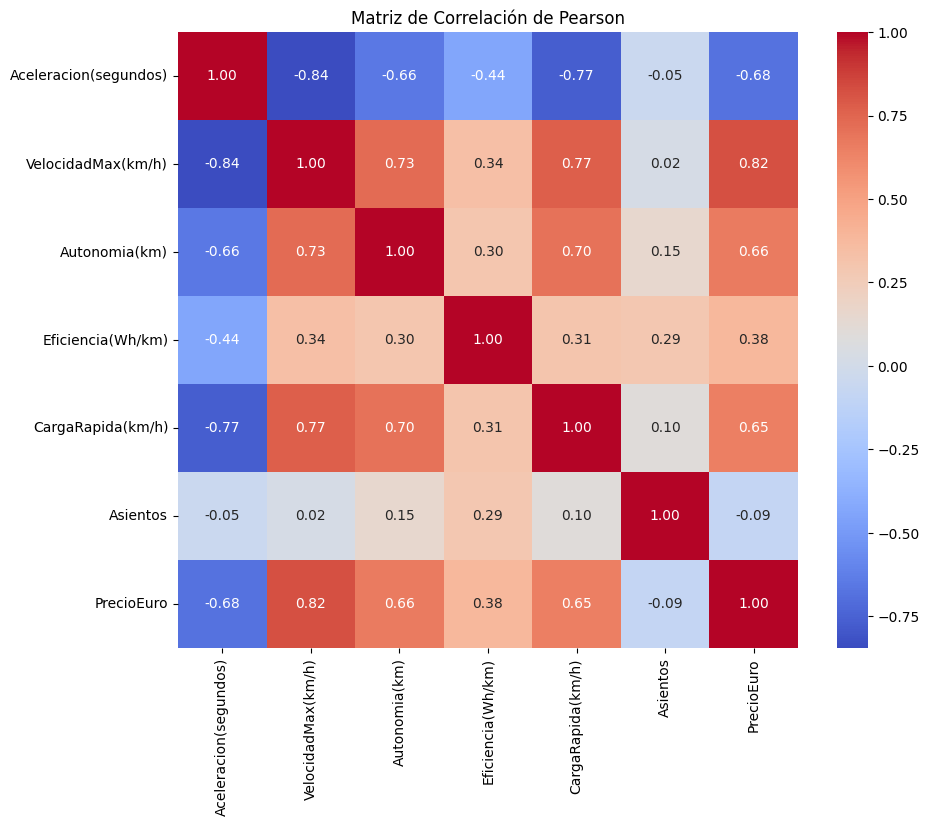

In [22]:
# Seleccionar solo las columnas de interés
columnas_de_interes = ['Aceleracion(segundos)', 'VelocidadMax(km/h)', 'Autonomia(km)', 'Eficiencia(Wh/km)', 'CargaRapida(km/h)', 'Asientos', 'PrecioEuro']
df_interes = df[columnas_de_interes]

# Calcular la matriz de correlación de Pearson
matriz_correlacion = df_interes.corr()

# Mostrar la matriz de correlación
print(matriz_correlacion)

# Visualización de la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Pearson')
plt.show()


## Los 10 modelos màs eficientes

In [23]:
# Ordenar el DataFrame por la columna 'Eficiencia(Wh/km)' de forma ascendente para obtener los más eficientes primero
df_ordenado = df.sort_values(by='Eficiencia(Wh/km)', ascending=True)

# Seleccionar las columnas 'Marca', 'Modelo', 'Eficiencia_WhKm', y 'PrecioEuro', y obtener los primeros 10 registros
top10_eficientes = df_ordenado[['Marca', 'Modelo', 'Eficiencia(Wh/km)', 'PrecioEuro']].head(10)

# Mostrar el top 10 de los modelos más eficientes con su marca, eficiencia y precio
print(top10_eficientes)


         Marca                         Modelo  Eficiencia(Wh/km)  PrecioEuro
48  Lightyear                            One                 104      149000
14    Hyundai                  IONIQ Electric                153       34459
8       Tesla     Model 3 Standard Range Plus                153       46380
41    Hyundai            Kona Electric 39 kWh                154       33971
74       Sono                           Sion                 156       25500
19       Mini                      Cooper SE                 156       31681
12    Hyundai            Kona Electric 64 kWh                160       40795
60    Renault                   Zoe ZE40 R110                161       29234
28        BMW                       i3 120 Ah                161       38017
0       Tesla   Model 3 Long Range Dual Motor                161       55480


## Los 10 modelos menos eficientes.

In [24]:
# Ordenar el DataFrame por la columna 'Eficiencia(Wh/km)' de forma descendente 
df_ordenado_menos_eficientes = df.sort_values(by='Eficiencia(Wh/km)', ascending=False)

# Seleccionar las columnas 'Marca', 'Modelo', 'Eficiencia_WhKm', y 'PrecioEuro', y obtener los primeros 10 registros
bottom10_eficientes = df_ordenado_menos_eficientes[['Marca', 'Modelo', 'Eficiencia(Wh/km)', 'PrecioEuro']].head(10)

# Mostrar el top 10 de los modelos menos eficientes con su marca, eficiencia y precio
print(bottom10_eficientes)

         Marca                           Modelo  Eficiencia(Wh/km)  PrecioEuro
84   Mercedes                      EQV 300 Long                273       70631
90       Audi               e-tron S 55 quattro                270       93800
33      Tesla              Cybertruck Tri Motor                267       75000
67      Tesla             Cybertruck Dual Motor                261       55000
99       Audi     e-tron S Sportback 55 quattro                258       96050
86      Tesla           Cybertruck Single Motor                256       45000
73      Byton                 M-Byte 95 kWh 4WD                244       64000
102     Byton                 M-Byte 95 kWh 2WD                238       62000
50       Audi                 e-tron 55 quattro                237       79445
101    Nissan   Ariya e-4ORCE 87kWh Performance                232       65000
